In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

In [7]:
path_to_results = os.path.join(os.getcwd(),  "Scenarios", "ResultsNL-case-study.xlsx")
path_to_plots = os.path.join(os.getcwd(),  "Scenarios")

In [3]:
technology_colors = {
    'Biomass_CHP_wood_pellets_DH': "green",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "darkred",
    'Hydropower_reservoir_medium': "darkcyan",
    'PV_utility_systems': "gold",
    'WTG_onshore': "cornflowerblue",
    "WTG_offshore": "navy",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine",
    "Lithium_ion_battery": "hotpink",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange"
}

In [8]:
CostRecovery_data = pd.read_excel(path_to_results, sheet_name='CostRecovery', index_col=0)
Coststosociety_data = pd.read_excel(path_to_results, sheet_name='CosttoSociety', index_col=0)
LOL_data = pd.read_excel(path_to_results, sheet_name='LOL', index_col=0)
ENS_data = pd.read_excel(path_to_results, sheet_name='ENS', index_col=0)
SupplyRatio_data = pd.read_excel(path_to_results, sheet_name='SupplyRatio', index_col=0)
ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='ElectricityPrices', index_col=0)
CM_data = pd.read_excel(path_to_results, sheet_name='CM_clearing_price', index_col=0)
VRES_data = pd.read_excel(path_to_results, sheet_name='VRES', index_col=0)
ShareRES_data = pd.read_excel(path_to_results, sheet_name='ShareRES', index_col=0)
Last_year_capacity_data = pd.read_excel(path_to_results, sheet_name='last_year_capacity', index_col=0)

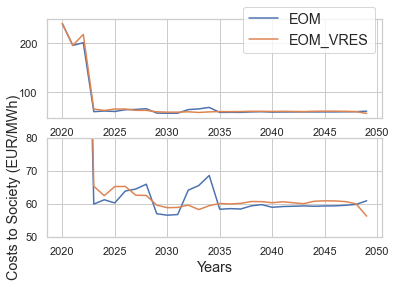

In [40]:
# axs1 = sns.lineplot(data=Coststosociety_data, palette="tab10", linewidth=2.5)
# plt.grid()
# sns.set_style("whitegrid")
# plt.grid()
# plt.xlabel('Years', fontsize='medium')
# plt.ylabel('Eur', fontsize='medium')
# plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
# axs1.set_title('Costs to Society')
# fig1 = axs1.get_figure()
# fig1.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot(Coststosociety_data)
#ax1 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
plt.ylabel('Costs to Society (EUR/MWh)', fontsize='large')
plt.ylim([50, 80])
ax1.legend(Coststosociety_data.columns.values, bbox_to_anchor=(1, 1.2), fontsize='large')
ax2.plot(Coststosociety_data)
#ax2 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
plt.xlabel('Years', fontsize='large')
fig.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

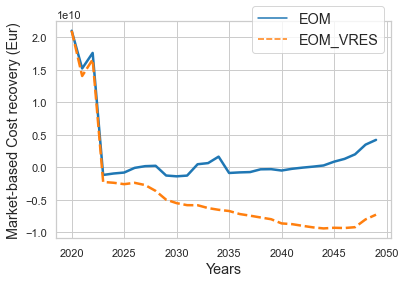

In [39]:
#CostRecovery_data.plot()
axs2 = sns.lineplot(data=CostRecovery_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Market-based Cost recovery (Eur)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('Market-based Cost recovery')
fig2 = axs2.get_figure()
fig2.savefig(path_to_plots + '/' + 'Cost_Recovery.png', bbox_inches='tight', dpi=300)

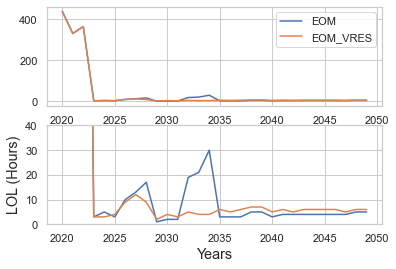

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot(LOL_data)
#ax1 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
plt.ylabel('Hours', fontsize='large')
plt.ylim([0, 40])
ax1.legend(LOL_data.columns.values)
ax2.plot(LOL_data)
#ax2 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
plt.xlabel('Years', fontsize='large')
plt.ylabel('LOL (Hours)', fontsize='large')

#ax1.set_title('Loss of load')

fig.savefig(path_to_plots + '/' + 'Loss of Load.png', bbox_inches='tight', dpi=300)

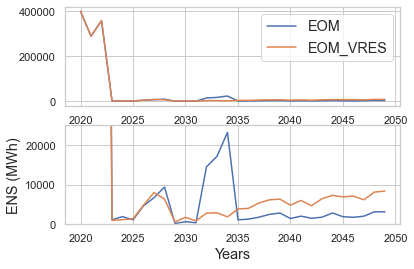

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot(ENS_data)
#ax1 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
plt.ylabel('MWh', fontsize='medium')
plt.ylim([0, 25000])

ax2.plot(ENS_data)
#ax2 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
plt.xlabel('Years', fontsize='large')
plt.ylabel('ENS (MWh)', fontsize='large')
ax1.legend(LOL_data.columns.values, fontsize='large')
#ax1.set_title('Energy not supplied')
fig.savefig(path_to_plots + '/' + 'Energy not supplied.png', bbox_inches='tight', dpi=300)

s


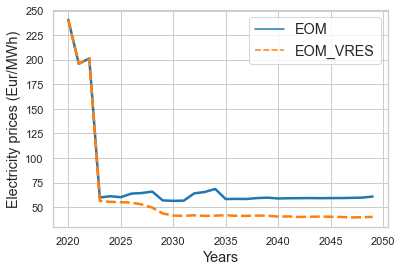

In [36]:
#CostRecovery_data.plot()
axs6 = sns.lineplot(data=ElectricityPrices_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Electricity prices (Eur/MWh)', fontsize='large')
plt.legend(fontsize='large')
#axs6.set_title('Electricity prices')
fig6 = axs6.get_figure()
fig6.savefig(path_to_plots + '/' + 'Electricity prices.png', bbox_inches='tight', dpi=300)

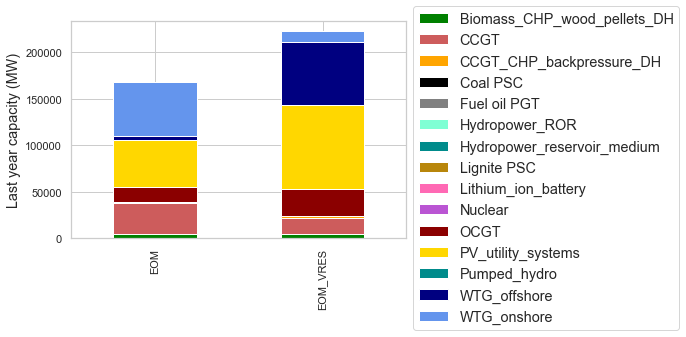

In [35]:
cpacities = Last_year_capacity_data.T
cpacities_nozeroes = cpacities[cpacities>0]
cpacities_nozeroes.dropna(how='all', axis =1, inplace=True)
colors = [technology_colors[tech] for tech in cpacities.columns.values]
axs9 = cpacities.plot(kind='bar', stacked=True, color=colors)
plt.grid()
sns.set_style("whitegrid")
plt.grid()

plt.ylabel('Last year capacity (MW)', fontsize='large')
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1.1))
#axs9.set_title('Last year installed capacity')
fig9 = axs9.get_figure()
fig9.savefig(path_to_plots + '/' + 'Last year capacity.png', bbox_inches='tight', dpi=300)


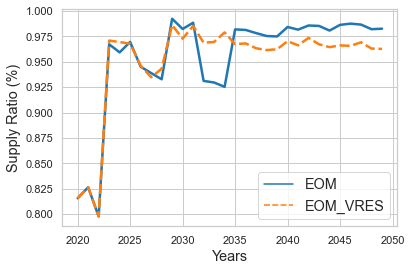

In [34]:
axs7 = sns.lineplot(data=SupplyRatio_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Supply Ratio (%)', fontsize='large')
plt.legend(fontsize='large')
#axs7.set_title('Supply Ratio')
fig7 = axs7.get_figure()
fig7.savefig(path_to_plots + '/' + 'Supply Ratio.png', bbox_inches='tight', dpi=300)


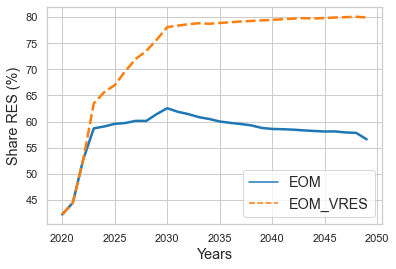

In [33]:
percentage_RES = ShareRES_data*100
axs8 = sns.lineplot(data=percentage_RES, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Share RES (%)', fontsize='large')
plt.legend(fontsize='large')
#axs8.set_title('Share RES')
fig8 = axs8.get_figure()
fig8.savefig(path_to_plots + '/' + 'Share RES.png', bbox_inches='tight', dpi=300)
